# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача в этом задании оценивается в **15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [2]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [3]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

distrs = [norm_distr, laplacian_distr, cauchy_distr]
distr_num = len(distrs)

dim0 = 4096

def get_test_data():    
    n=500
    distr_nums = np.random.randint(0, high = distr_num, size=dim0)
    test_data = []
    for i in range(dim0):
        test_data.append(distrs[distr_nums[i]].rvs(n))
    test_data = np.array(test_data)
    return distr_nums, test_data

Постройте график плотности распределения для всех трех распределений на одних осях.

In [4]:
distr_nums, test_data = get_test_data()

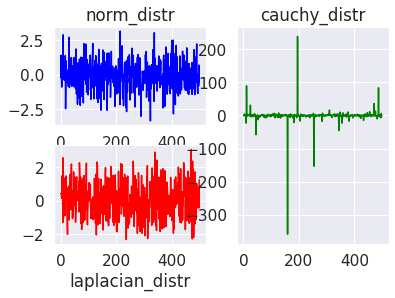

In [5]:
from pylab import *

pylab.subplot(2, 2, 1)
pylab.title('norm_distr')
pylab.plot(test_data[0], color='blue')

pylab.subplot (2, 2, 3)
pylab.xlabel('laplacian_distr')
pylab.plot(test_data[1], color='red')

pylab.subplot (1, 2, 2)
pylab.title('cauchy_distr')
pylab.plot(test_data[2], color='green')

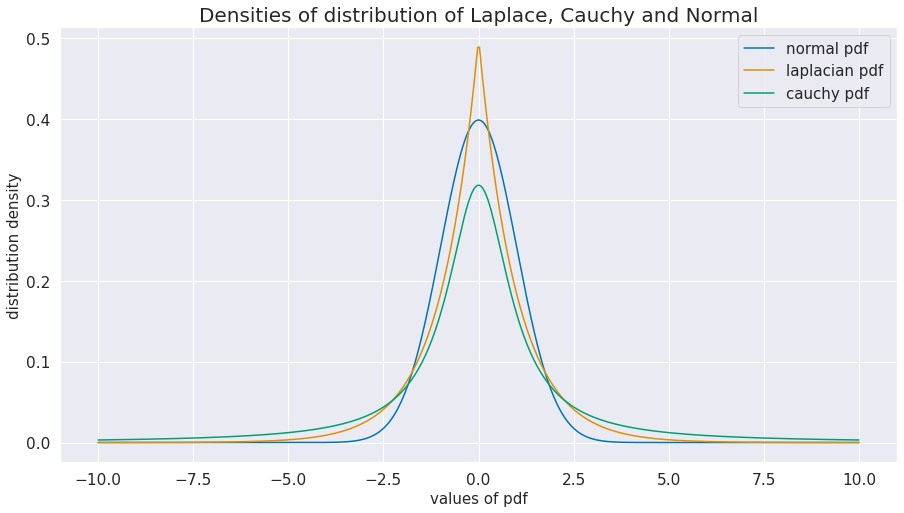

In [6]:
def density_plot(border):
  plt.figure(figsize=(15,8))
  plt.plot(border, norm_distr.pdf(border), color=color_for_normal, label="normal pdf")
  plt.plot(border, laplacian_distr.pdf(border), color=color_for_laplace, label="laplacian pdf")
  plt.plot(border, cauchy_distr.pdf(border), color=color_for_cauchy, label="cauchy pdf")
  plt.title('Densities of distribution of Laplace, Cauchy and Normal', fontsize=20)
  plt.xlabel('values of pdf', fontsize = 15)
  plt.ylabel('distribution density', fontsize = 15)
  plt.legend(fontsize=15, loc = 'best')
  plt.show()

border = np.linspace(-10, 10, 450)
density_plot(border)

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Для распределения Коши.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [7]:
import math
from scipy.stats import tmean

def truncated_mean(sample, alpha=0.3):
    limits = dl.stats.outliers(sample, method='percentiles', 
                               percentiles=(percentile, 100 - alpha*10))
    
    return tmean(sample, limits=limits)



**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [8]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    quantile = distr.ppf(q=1 - alpha)
    denominator = (1 - 2 * alpha)**2
    integral = quad(func=lambda x: (x**2) * distr.pdf(x), a=0, b=quantile)
    return 2 * (integral[0] + alpha * (quantile**2)) / denominator

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

In [9]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

In [10]:
titles = ['Normal', 'Laplacian', 'Cauchy']
distributions = [norm_distr, laplacian_distr, cauchy_distr]
colors = [color_for_normal, color_for_laplace, color_for_cauchy]
asymp_var_vector = np.vectorize(asymp_var)

def asymptotic_variance_plot(alpha_grid, distributions, titles, colors):
  fig, axes = plt.subplots(1, 3, figsize=(21, 7))
  fig.suptitle("Dependence of the asymptotic variance on the $\\alpha$", fontsize=20)
  for index in range(len(distributions)):
    axes[index].set_title(f"Asymptotic variance of {titles[index]} distribution")
    axes[index].set_ylabel("$\\sigma^2(\\alpha)$")
    axes[index].set_xlabel("$\\alpha$")
    axes[index].plot(alpha_grid, asymp_var_vector(distributions[index], alpha_grid), color=colors[index])
  plt.show()

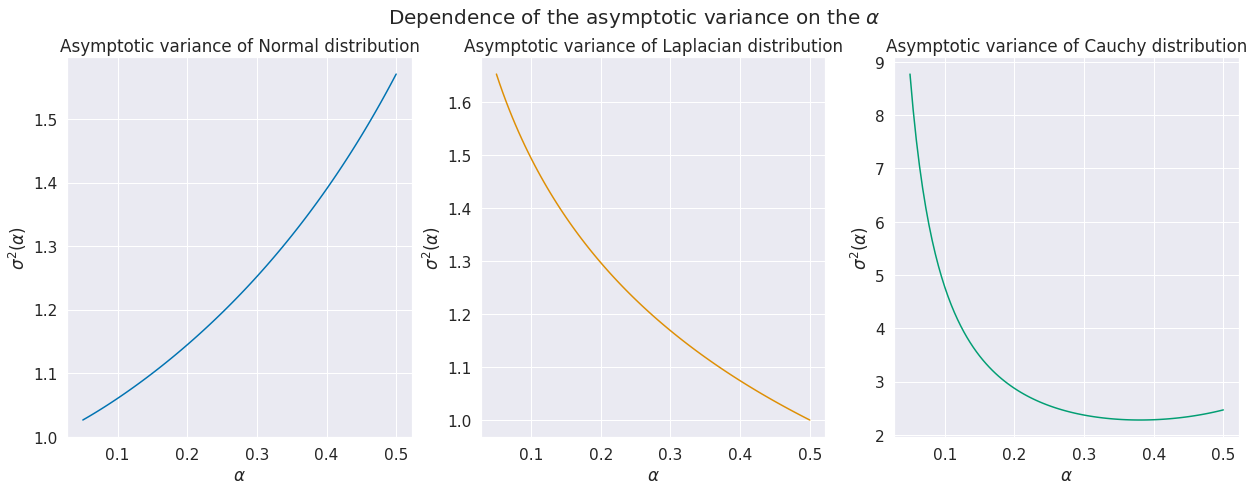

In [11]:
asymptotic_variance_plot(alpha_grid, distributions, titles, colors)

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** Усеченное среднее порядка 0.5 - это выборочная медиана, а также не трудно заметить, что усеченное среднее порядка 0 - это выборочная средняя. По графику видно, что у нормального распределения наихудщем разлетом усеченное среднее порядка 0.5 (т.е. в выборочной медиане), а наилучшем является усеченное среднее порядка 0 (т.е. в выборочной средней). 

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [12]:
def get_mean(distr, N):
    return np.cumsum(distr) / np.arange(1, N +1)

In [13]:
def get_median(distr, N):
    return [np.median(distr[:i]) for i in range(N)]

In [14]:
def get_truncated_mean(distr, N, alpha):
    return [truncated_mean(distr[:i], alpha) for i in range(N)]

In [15]:
def dependies_plot(mean, median, truncated_mean, color, title, N, ylim):
  plt.figure(figsize=(15, 8))
  border = np.arange(1, N + 1)
  plt.plot(border, mean, linestyle='-', color=color, label='mean')
  plt.plot(border, median, linestyle=':', color=color,label='median')
  plt.plot(border, truncated_mean, linestyle='--', color=color, label='truncated mean')
  plt.title(f"Dependence of the median, mean and truncated mean on the sample size of a {title} distribution", fontsize=20)
  plt.xlabel("size of simple", fontsize=15)
  plt.ylabel("values", fontsize=15)
  plt.xlim(12, N)
  plt.xticks((np.arange(50, N + 1, 50)))
  plt.ylim(ylim)
  plt.show()

In [16]:
norm_sample = norm_distr.rvs(size=N)
laplacian_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)

**Нормальное распределение**

In [17]:
#YOUR CODE GOES HERE

**Распределение Лапласа**

In [18]:
#YOUR CODE GOES HERE

**Распределение Коши**

In [19]:
#YOUR CODE GOES HERE

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [20]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/ashot/Documents/GitHub/winequality-red.csv
100%|█████████████████████████████████████████| 101k/101k [00:00<00:00, 133kB/s]


In [21]:
import pandas as pd

In [22]:
data = pd.read_csv("winequality-red.csv")

In [23]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [24]:
data['category'] = data['alcohol'].apply(lambda x: 'low alcohol' if x <= 10 else ('medium alcohol') if 0 < x <= 12 else 'high alcohol')

In [25]:
data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,low alcohol
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,medium alcohol
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,medium alcohol
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,low alcohol
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [26]:
df = pd.DataFrame(data.groupby('category')[['residual sugar']].agg([np.mean, np.median])).reset_index()

In [27]:
df.set_index(df['category'], inplace=True)

In [28]:
df

category residual sugar       
                                         mean median
category                                            
high alcohol      high alcohol       2.760993    2.3
low alcohol        low alcohol       2.445984    2.1
medium alcohol  medium alcohol       2.592264    2.2

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Параллельно возрастанию процента алкоголя количество сахара тоже увеличивается.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

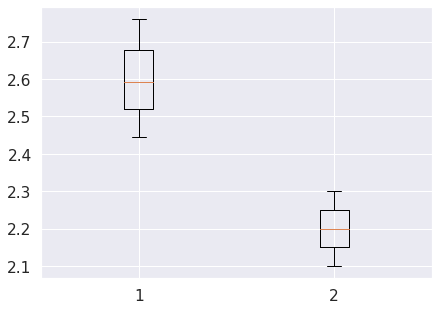

In [29]:
import seaborn as sns
palette = sns.color_palette("viridis", n_colors=3)[::-1]
np.random.seed(10) 
fig = plt.figure(figsize =(7, 5))
plt.boxplot(df['residual sugar'])
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** Лучше использовать среднее.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

In [30]:
def citric_acid_plot(data):
  plt.figure(figsize=(7, 7))
  sns.scatterplot(data=data.loc[(data['quality'] == 3) | (data['quality'] == 8)], 
                x='alcohol', 
                y='citric acid', 
                palette=[palette[0], palette[-1]], 
                hue='quality')
  plt.ylabel('amount of citric acid', fontsize=15)
  plt.xlabel('alcohol content', fontsize=15)
  plt.title('The dependence of the amount of citric acid on the alcohol content')
  plt.show()

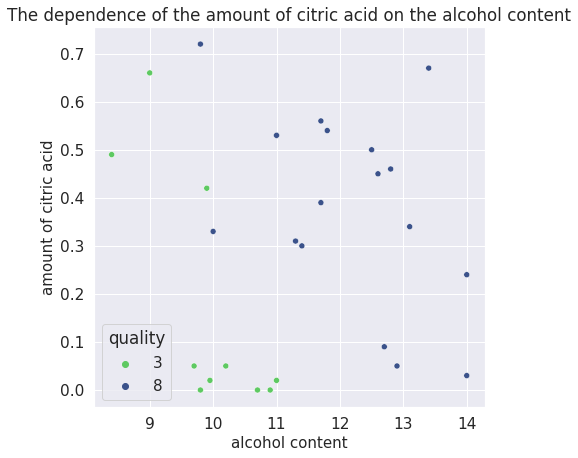

In [40]:
citric_acid_plot(data)

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [42]:
low_quality, high_quality = data.loc[(data['quality'] == 3)], data.loc[(data['quality'] == 8)]

low_quality_sample, high_quality_sample = low_quality[['alcohol', 'citric acid']], high_quality[['alcohol', 'citric acid']]

low_quality_mu, high_quality_mu = low_quality_sample.mean(), high_quality_sample.mean()

low_quality_cov, high_quality_cov = np.cov(low_quality_sample.T, bias=True), np.cov(high_quality_sample.T, bias=True)

# X - border for 'alcohol' and Y - border for 'citric acid'
X, Y = np.linspace(8, 15, 200), np.linspace(-0.4, 1, 200)

border = np.transpose([np.tile(X, Y.size), np.repeat(Y, X.size)]).reshape((Y.size, X.size, 2))

low_quality_pdf = sps.multivariate_normal(mean=low_quality_mu, cov=low_quality_cov).pdf(border)
high_quality_pdf = sps.multivariate_normal(mean=high_quality_mu, cov=high_quality_cov).pdf(border)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [33]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [43]:
cmaps = [get_density_cmap("Greens"), get_density_cmap("Blues")]
pdfs = [low_quality_pdf, high_quality_pdf]
colors = ["g", "b"]
samples = [low_quality, high_quality]
means = [low_quality_mu, high_quality_mu]
titles = ['low', 'high']

In [44]:
def density_cmap(samples, means, pfds, cmaps, titles, colors, X, Y):
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))
  for index in range(len(samples)):
    axes[index].set_title(f"Density of alcohol and citric acid in {titles[index]} quality wine")
    axes[index].pcolormesh(X, Y, pdfs[index], cmap=cmaps[index], shading='auto')
    cs = axes[index].contour(X, Y, pdfs[index], colors="grey")
    axes[index].clabel(cs, cs.levels, fontsize=10, colors='black')
    sns.scatterplot(ax=axes[index],
                    data=samples[index],
                    x='alcohol',
                    y='citric acid',
                    color=colors[index],
                    label=f"{titles[index]} quality")
  plt.show()

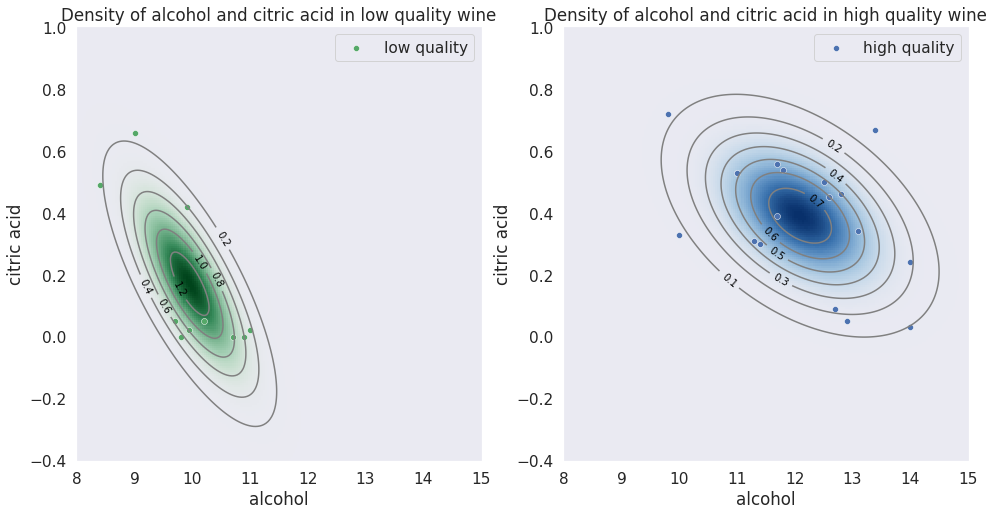

In [45]:
density_cmap(samples, means, pdfs, cmaps, titles, colors, X, Y)

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Как по графике мы можем заметить вино с высоким качеством содержит лиммонной кислоты и алкоголя заметно больше.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

%matplotlib inline

In [36]:
# Считаем информацию Фишера для разных значений параметра theta
Fisher = np.array([1 / (theta * (1 - theta)) for theta in np.arange(0.01, 1, 0.01)])    

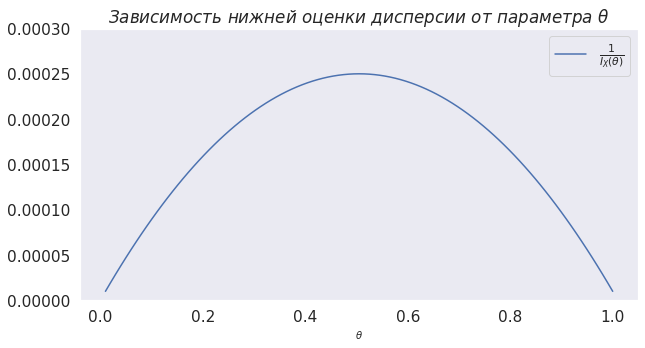

In [37]:
# Строим график
N = 1000
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.01, 1, 99), 1 /(N * Fisher), label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.0003)

plt.legend()
plt.title(r'$Зависимость \ нижней \ оценки \ дисперсии \ от \ параметра \ \theta$')
plt.xlabel(r'$\theta$', fontsize='10')
plt.grid()
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**

Можно сделать вывод, что при $\theta = 0,5$ функция нижней оценки дисперсии $\frac{1}{I_X(\theta)} = \frac{1}{n*i(\theta)}$ достигает максимума, что означает, что при  данном значении параметра в одном наблюдении содержится минимальное количество информации Фишера.




 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [38]:
K = 500
variance = []
for theta in np.arange(0.01, 1, 0.01):
    sample = binom.rvs(1, theta, size=N)
    eff_estimate = np.cumsum(sample) / [1 + n for n in range(N)]
    b_samples = np.array([binom.rvs(1, eff_estimate[N - 1], size=N) for k in range(K)])
    b_effs = np.array([np.cumsum(b_samples[k]) / [1 + n for n in range(N)] for k in range(K)])
    b_var = np.sum(np.array([b_effs[k][N - 1] 
                             for k in range(K)]) ** 2) / K - (np.sum([b_effs[k][N - 1] 
                                                                      for k in range(K)]) / K) ** 2
    variance.append(b_var)

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

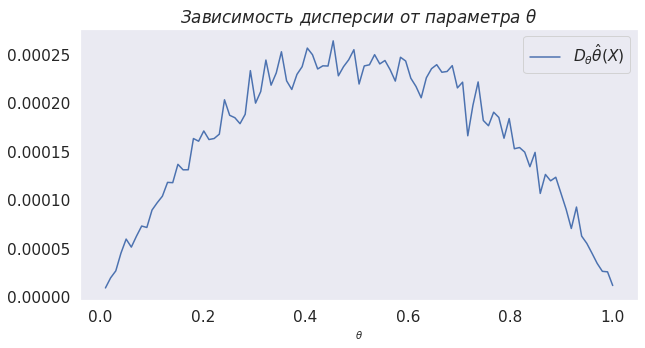

In [39]:
# Строим график зависимости дисперсии от theta
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.01, 1, 99), variance, label=r'$D_{\theta}\hat\theta(X)$')

plt.legend()
plt.title(r'$Зависимость \ дисперсии \ от \ параметра \ \theta$')
plt.xlabel(r'$\theta$', fontsize='10')
plt.grid()
plt.show()

# Вывод

$$D_{\theta}\hat\theta(X) = D_{\theta}(\bar{X}) = \dots = \frac{\theta(1 - \theta)}{n}$$

$$I_{X}(\theta) = n* i(\theta) = \frac{n}{\theta(1-\theta)}$$

По определению эффективной оценки неравенство Крамера-Рао должно превращаться в равенство:
$$ D_{\theta}\hat\theta(X) = \frac{1}{I_{X}(\theta)} = \frac{1}{n*i(\theta)} $$

Из графиков видно, что равенство в неравенстве Крамера-Рао выполняется, и оценка $\bar{X}$ действительно является эффективной для распределения Бернулли. 
